In [104]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, normalized_mutual_info_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [105]:
#logistic regression model
#Migraine association as response variable without resample
#not scaled

df = pd.read_csv('migraine5.csv')

label_encoders = {
    'chromosome': LabelEncoder(),
    'reference_allele': LabelEncoder(),
    'other_allele': LabelEncoder()
}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])
    
X = df.iloc[:, 1:-1]
y = df['migraine_association']
X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(X, y, test_size=0.3, random_state=42)

ma_model = LogisticRegression()
ma_model.fit(X_train_ma, y_train_ma)
y_pred_ma = ma_model.predict(X_test_ma)

f1= f1_score(y_test_ma, y_pred_ma)
accuracy = accuracy_score(y_test_ma, y_pred_ma)
nmi = normalized_mutual_info_score(y_test_ma, y_pred_ma)

ma_metrics = {
    "F1-Score": f1,
    "Accuracy": accuracy,
    "Normalized Mutual Information Score": nmi
}

print(ma_metrics)


# prediction for (“rs1542668”, “rs2078371”, “rs13078967”)
rs_example = pd.DataFrame({
    'chromosome': ['14', '1', '3'],
    'position': [42548912, 115677183, 154289946],
    'reference_allele': ['A', 'C', 'C'],
    'other_allele': ['G', 'T', 'A'],
    'eaf': [0.328515, 0.117396, 0.026733],
    'beta': [0.030724, 0.106181, 0.145952],
    'se': [0.00551, 0.007819, 0.017759],
    'beta_95L': [-0.041524, 0.090855, -0.180759],
    'beta_95U': [-0.019924, 0.121508, -0.111146],
    'z': [-5.575732, 13.579069, -8.218722],
    'p.value': [0.0000000253, 5.87E-42, 0.000000000000000216],
    '_-log10_p-value': [7.597694, 41.231261, 15.664752],
    'q_statistic': [3.136115, 9.880614, 5.262699],
    'q_p-value': [0.371111, 0.042487, 0.261389],
    'i2': [0.043402, 0.595167, 0.239934]
})

for col, encoder in label_encoders.items():
    rs_example[col] = encoder.transform(rs_example[col])

rs_example = rs_example[X.columns]
predictions = ma_model.predict(rs_example)
print(predictions)

{'F1-Score': 0.0, 'Accuracy': 0.9867659222497932, 'Normalized Mutual Information Score': 0.0}
[0 0 0]


In [106]:
##logistic regression model
#Migraine association as response variable without resample
#scaled

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_sc)
X_test_sc = scaler.transform(X_test_sc)

# Creating and training the logistic regression model
sc_model = LogisticRegression()
sc_model.fit(X_train_sc, y_train_sc)
y_pred_sc = sc_model.predict(X_test_sc)

# Calculating metrics
f1 = f1_score(y_test_sc, y_pred_sc)
accuracy = accuracy_score(y_test_sc, y_pred_sc)
nmi = normalized_mutual_info_score(y_test_sc, y_pred_sc)

sc_metrics = {
    "F1-Score": f1,
    "Accuracy": accuracy,
    "Normalized Mutual Information Score": nmi
}

print(sc_metrics)


# prediction for (“rs1542668”, “rs2078371”, “rs13078967”)
rs_example = pd.DataFrame({
    'chromosome': ['14', '1', '3'],
    'position': [42548912, 115677183, 154289946],
    'reference_allele': ['A', 'C', 'C'],
    'other_allele': ['G', 'T', 'A'],
    'eaf': [0.328515, 0.117396, 0.026733],
    'beta': [0.030724, 0.106181, 0.145952],
    'se': [0.00551, 0.007819, 0.017759],
    'beta_95L': [-0.041524, 0.090855, -0.180759],
    'beta_95U': [-0.019924, 0.121508, -0.111146],
    'z': [-5.575732, 13.579069, -8.218722],
    'p.value': [0.0000000253, 5.87E-42, 0.000000000000000216],
    '_-log10_p-value': [7.597694, 41.231261, 15.664752],
    'q_statistic': [3.136115, 9.880614, 5.262699],
    'q_p-value': [0.371111, 0.042487, 0.261389],
    'i2': [0.043402, 0.595167, 0.239934]
})

for col, encoder in label_encoders.items():
    rs_example[col] = encoder.transform(rs_example[col])

rs_example = rs_example[X.columns]
rs_example_scaled = scaler.transform(rs_example)

# Make predictions with the logistic regression model
predictions = sc_model.predict(rs_example_scaled)
print(predictions)

{'F1-Score': 0.6666666666666666, 'Accuracy': 0.9933829611248967, 'Normalized Mutual Information Score': 0.5559282534153142}
[1 0 1]


In [107]:
#beta as response variable
#beta > 0.05 means related to migraine, otherwise means not related to
#not scaled

label_encoders = {
    'chromosome': LabelEncoder(),
    'reference_allele': LabelEncoder(),
    'other_allele': LabelEncoder()
}

original_df = pd.read_csv('migraine5.csv')
for col, encoder in label_encoders.items():
    encoder.fit(original_df[col])

df['beta_rs'] = (df['beta'] > 0.05).astype(int)
X_beta = df.drop(['beta', 'beta_rs', 'rs_number','migraine_association'], axis=1)
y_beta = df['beta_rs']


X_train_beta, X_test_beta, y_train_beta, y_test_beta = train_test_split(X_beta, y_beta, test_size=0.3, random_state=42)
beta_model = LogisticRegression()
beta_model.fit(X_train_beta, y_train_beta)
y_pred_beta = beta_model.predict(X_test_beta)


f1 = f1_score(y_test_beta, y_pred_beta)
accuracy = accuracy_score(y_test_beta, y_pred_beta)
nmi = normalized_mutual_info_score(y_test_beta, y_pred_beta)

# Output metrics
beta_metrics = {
    "F1-Score": f1,
    "Accuracy": accuracy,
    "Normalized Mutual Information Score": nmi
}

print(beta_metrics)

# prediction for (“rs1542668”, “rs2078371”, “rs13078967”)
rs_example = pd.DataFrame({
    'chromosome': ['14', '1', '3'],
    'position': [42548912, 115677183, 154289946],
    'reference_allele': ['A', 'C', 'C'],
    'other_allele': ['G', 'T', 'A'],
    'eaf': [0.328515, 0.117396, 0.026733],
    'beta': [0.030724, 0.106181, 0.145952],
    'se': [0.00551, 0.007819, 0.017759],
    'beta_95L': [-0.041524, 0.090855, -0.180759],
    'beta_95U': [-0.019924, 0.121508, -0.111146],
    'z': [-5.575732, 13.579069, -8.218722],
    'p.value': [0.0000000253, 5.87E-42, 0.000000000000000216],
    '_-log10_p-value': [7.597694, 41.231261, 15.664752],
    'q_statistic': [3.136115, 9.880614, 5.262699],
    'q_p-value': [0.371111, 0.042487, 0.261389],
    'i2': [0.043402, 0.595167, 0.239934]
})

for col, encoder in label_encoders.items():
    rs_example[col] = encoder.transform(rs_example[col])

# Ensuring the order of columns in rs_example matches the training data
rs_example = rs_example[X_beta.columns]

# Make predictions with the logistic regression model
predictions = beta_model.predict(rs_example)
print(predictions)

{'F1-Score': 0.0, 'Accuracy': 0.814309346567411, 'Normalized Mutual Information Score': 0.0}
[0 0 0]


In [108]:
#beta as variable
#beta > 0.05 means related to migraine, otherwise means not related to
#scaled

X_train_beta_sc, X_test_beta_sc, y_train_beta_sc, y_test_beta_sc = train_test_split(X_beta, y_beta, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_beta_sc = scaler.fit_transform(X_train_beta_sc)
X_test_beta_sc = scaler.transform(X_test_beta_sc)

beta_sc_model = LogisticRegression()
beta_sc_model.fit(X_train_beta_sc, y_train_beta_sc)
y_pred_beta_sc = beta_sc_model.predict(X_test_beta_sc)

f1 = f1_score(y_test_beta_sc, y_pred_beta_sc)
accuracy = accuracy_score(y_test_beta_sc, y_pred_beta_sc)
nmi = normalized_mutual_info_score(y_test_beta_sc, y_pred_beta_sc)

# Output metrics
beta_sc_metrics = {
    "F1-Score": f1,
    "Accuracy": accuracy,
    "Normalized Mutual Information Score": nmi
}

print(beta_sc_metrics)

# prediction for (“rs1542668”, “rs2078371”, “rs13078967”)
rs_example = pd.DataFrame({
    'chromosome': ['14', '1', '3'],
    'position': [42548912, 115677183, 154289946],
    'reference_allele': ['A', 'C', 'C'],
    'other_allele': ['G', 'T', 'A'],
    'eaf': [0.328515, 0.117396, 0.026733],
    'beta': [0.030724, 0.106181, 0.145952],
    'se': [0.00551, 0.007819, 0.017759],
    'beta_95L': [-0.041524, 0.090855, -0.180759],
    'beta_95U': [-0.019924, 0.121508, -0.111146],
    'z': [-5.575732, 13.579069, -8.218722],
    'p.value': [0.0000000253, 5.87E-42, 0.000000000000000216],
    '_-log10_p-value': [7.597694, 41.231261, 15.664752],
    'q_statistic': [3.136115, 9.880614, 5.262699],
    'q_p-value': [0.371111, 0.042487, 0.261389],
    'i2': [0.043402, 0.595167, 0.239934]
})

for col, encoder in label_encoders.items():
    rs_example[col] = encoder.transform(rs_example[col])

# Ensuring the order of columns in rs_example matches the training data
rs_example = rs_example[X_beta.columns]
rs_example_scaled = scaler.transform(rs_example)

# Making predictions
predictions = beta_sc_model.predict(rs_example_scaled)
print(predictions)

{'F1-Score': 0.9899665551839465, 'Accuracy': 0.9962779156327544, 'Normalized Mutual Information Score': 0.9508561740842298}
[0 1 0]


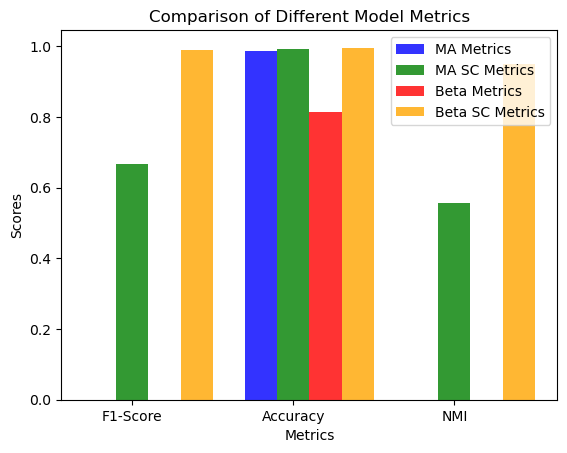

In [109]:
ma_metrics = {"F1-Score": 0, "Accuracy": 0.9867659222497932, "NMI": 0}
ma_sc_metrics = {"F1-Score": 0.6666666666666666, "Accuracy": 0.9933829611248967, "NMI": 0.5559282534153142}
beta_metrics = {"F1-Score": 0, "Accuracy": 0.814309346567411, "NMI": 0}
beta_sc_metrics = {"F1-Score": 0.9899665551839465, "Accuracy": 0.9962779156327544, "NMI": 0.9508561740842298}

metrics = ["F1-Score", "Accuracy", "NMI"]
ma_values = [ma_metrics[metric] for metric in metrics]
sc_values = [ma_sc_metrics[metric] for metric in metrics]
beta_values = [beta_metrics[metric] for metric in metrics]
beta_sc_values = [beta_sc_metrics[metric] for metric in metrics]

x = range(len(metrics)) 

# Plotting
fig, ax = plt.subplots()
bar_width = 0.2  # width of the bars
opacity = 0.8  # opacity of the colors

rects1 = ax.bar(x, ma_values, bar_width, alpha=opacity, color='blue', label='MA Metrics')
rects2 = ax.bar([p + bar_width for p in x], sc_values, bar_width, alpha=opacity, color='green', label='MA SC Metrics')
rects3 = ax.bar([p + bar_width * 2 for p in x], beta_values, bar_width, alpha=opacity, color='r', label='Beta Metrics')
rects4 = ax.bar([p + bar_width * 3 for p in x], beta_sc_values, bar_width, alpha=opacity, color='orange', label='Beta SC Metrics')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Model Metrics')
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


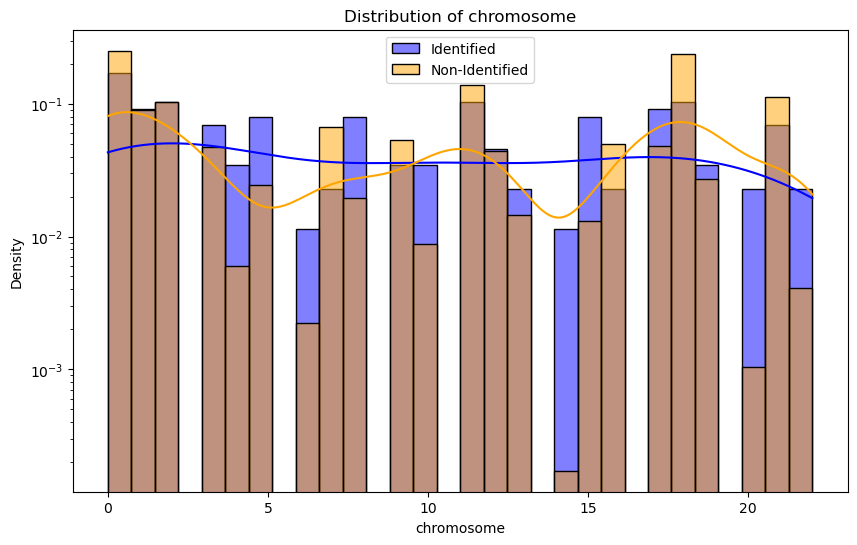

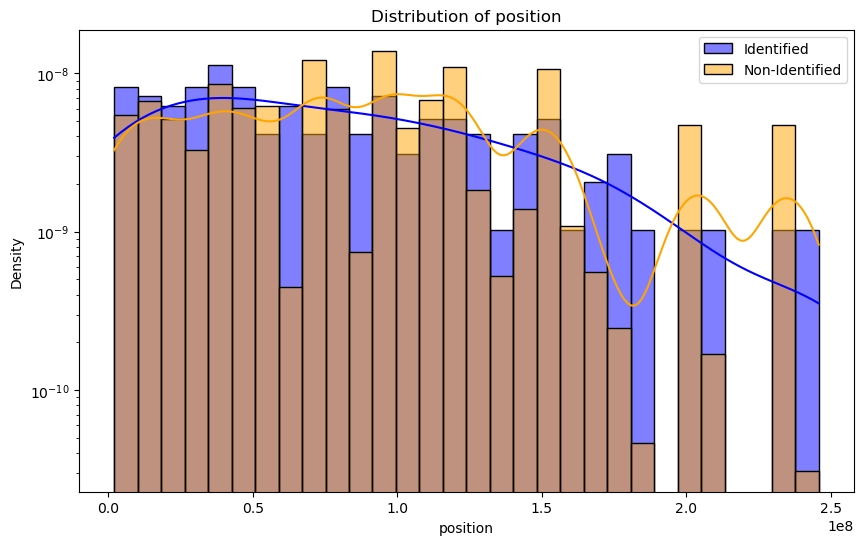

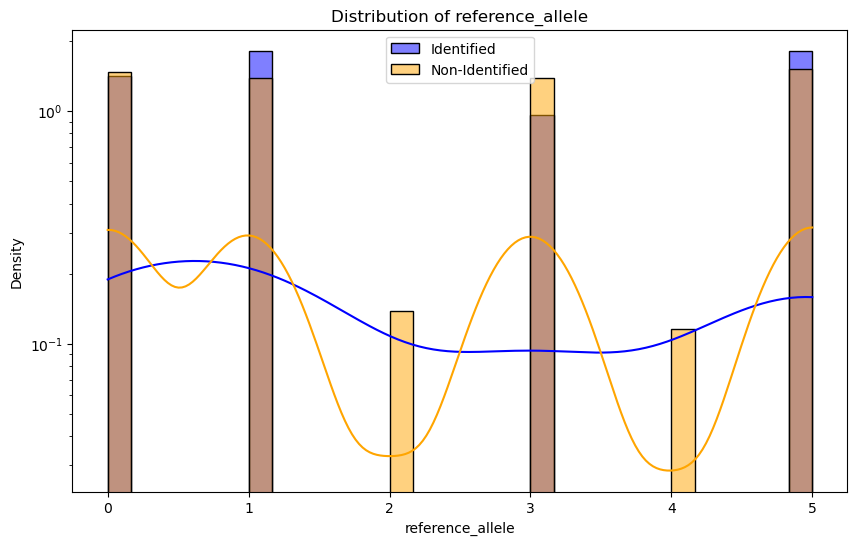

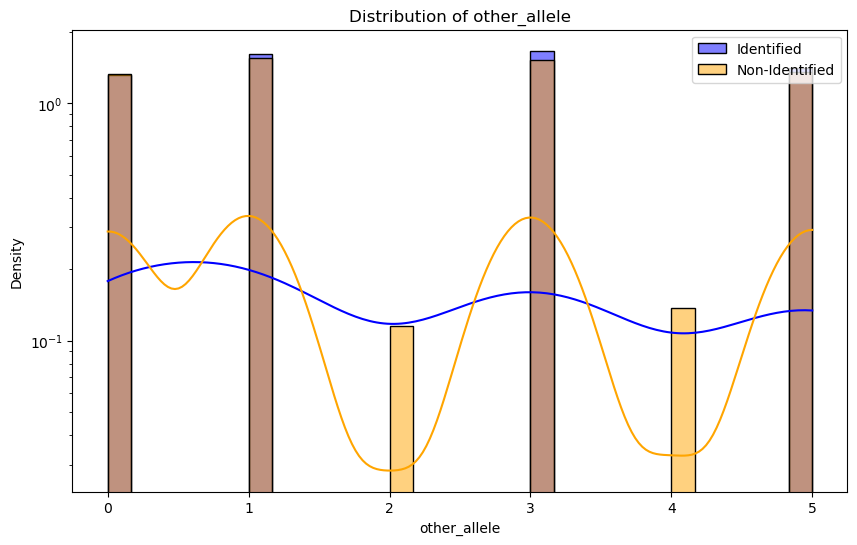

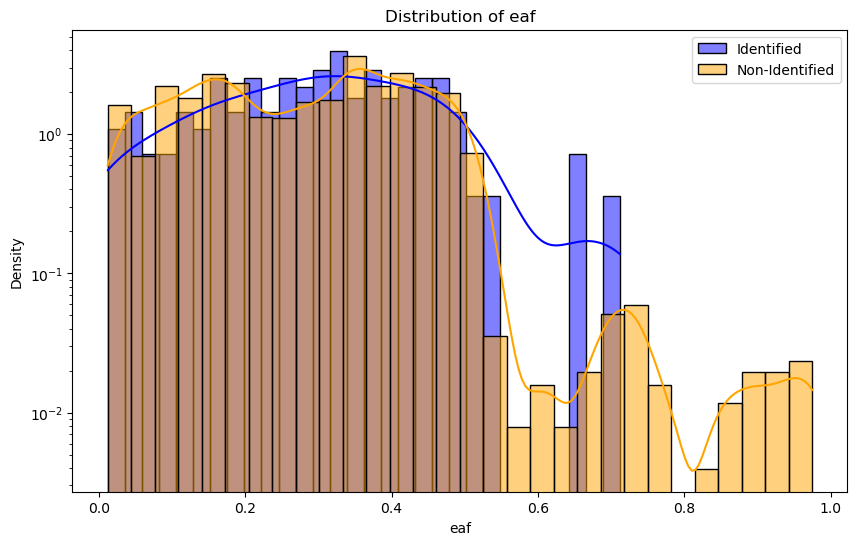

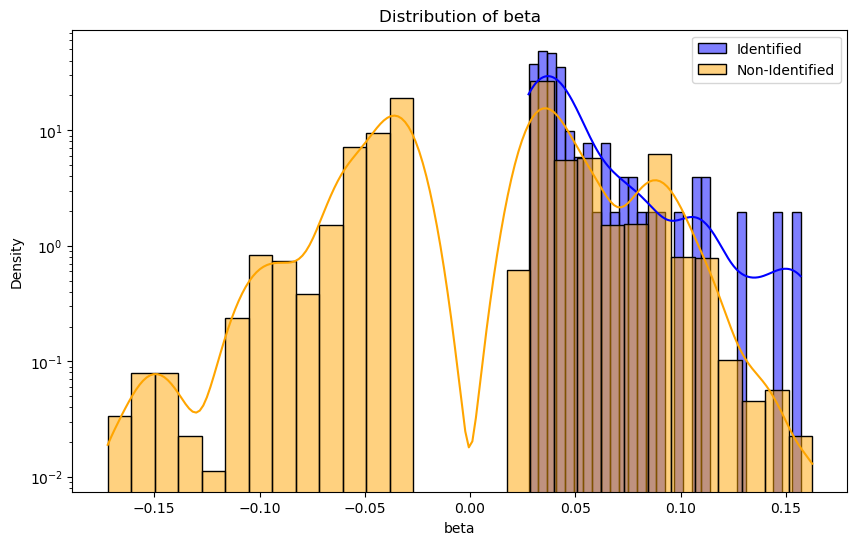

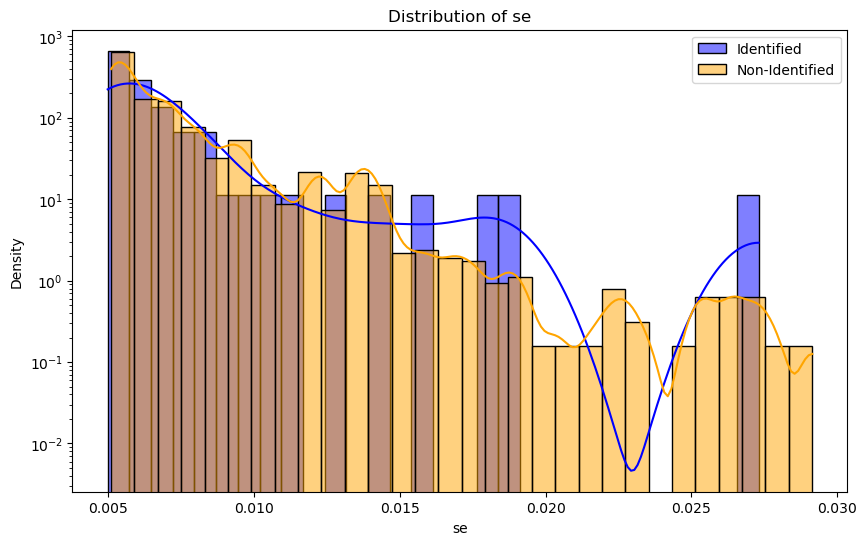

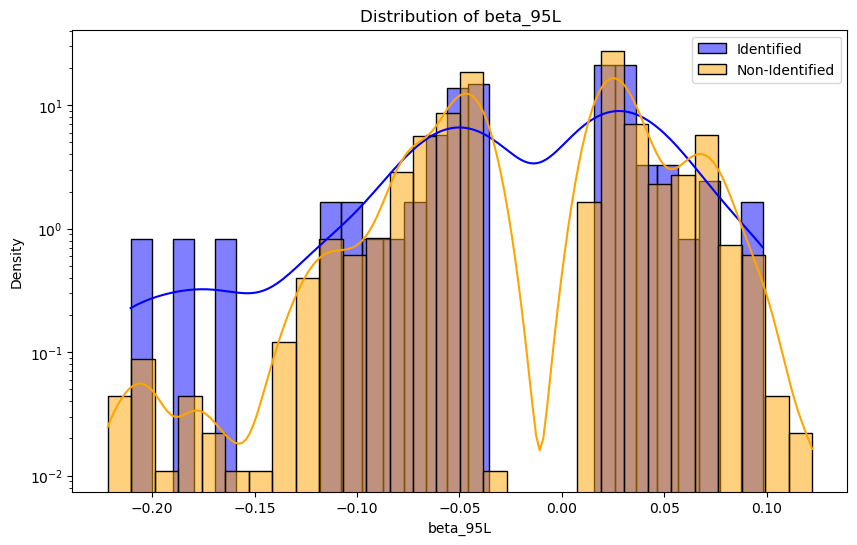

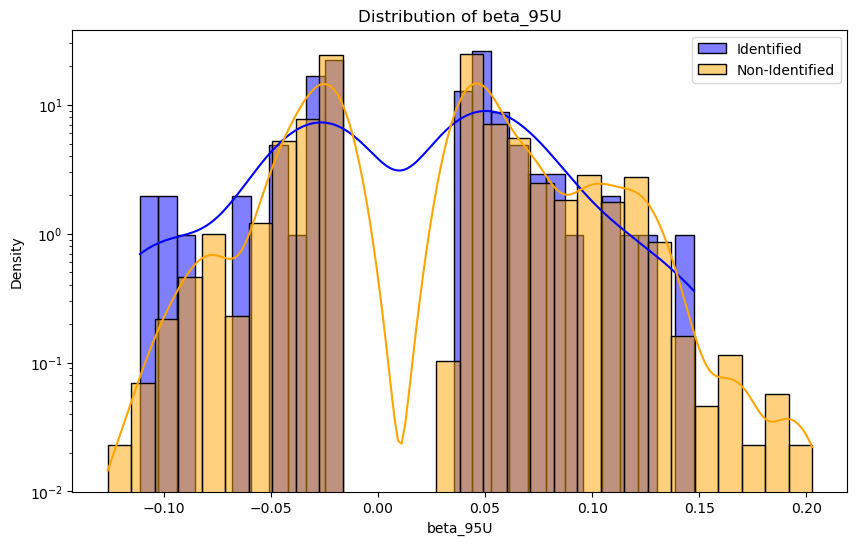

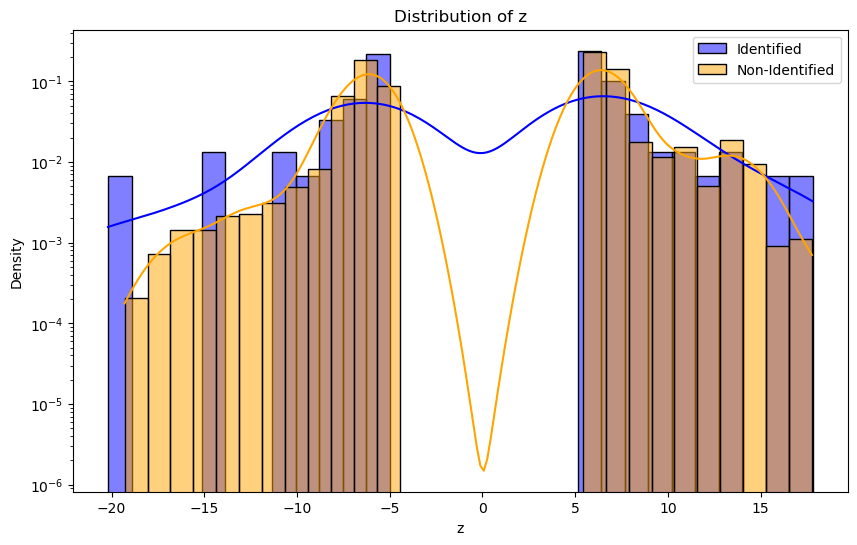

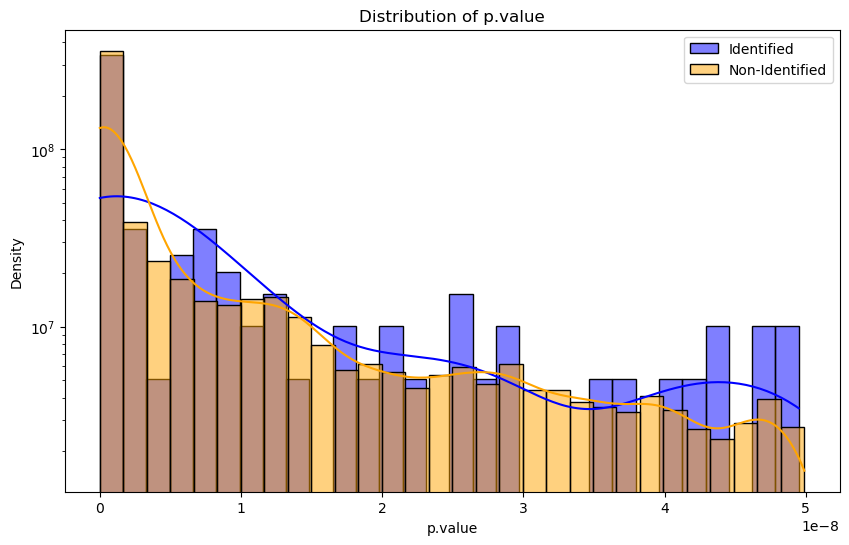

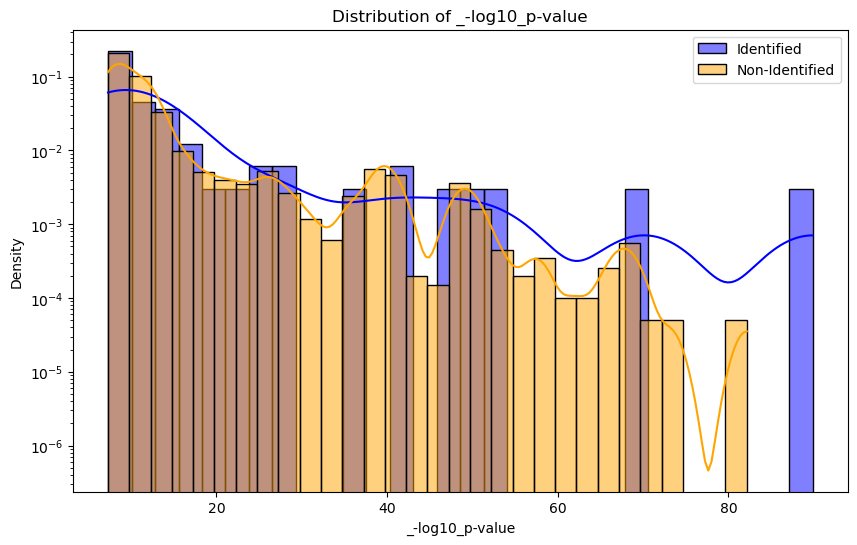

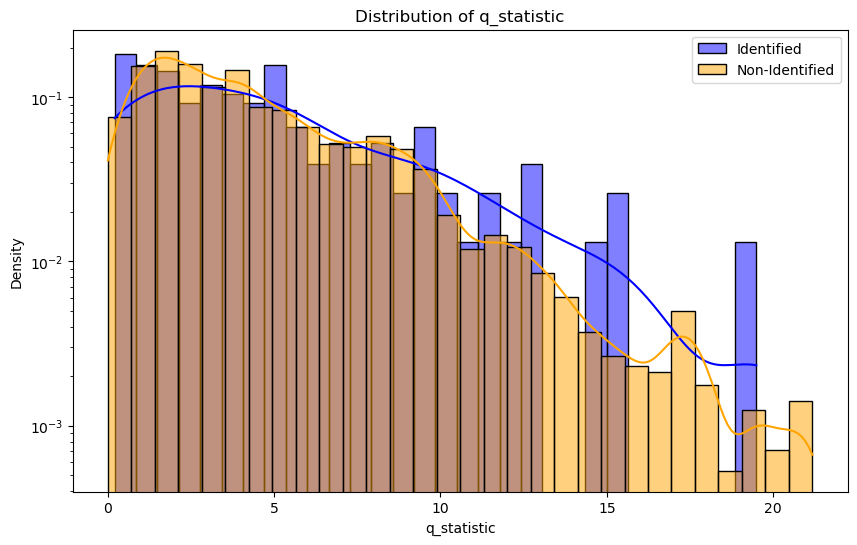

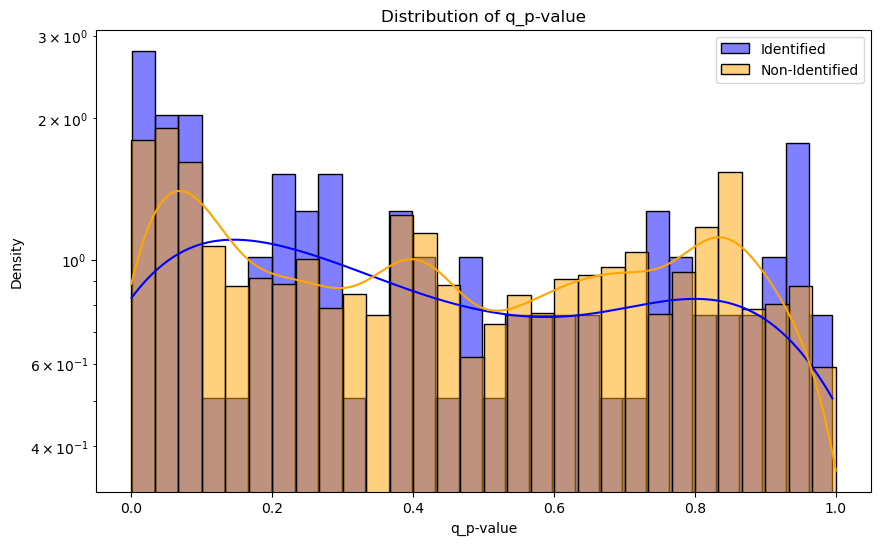

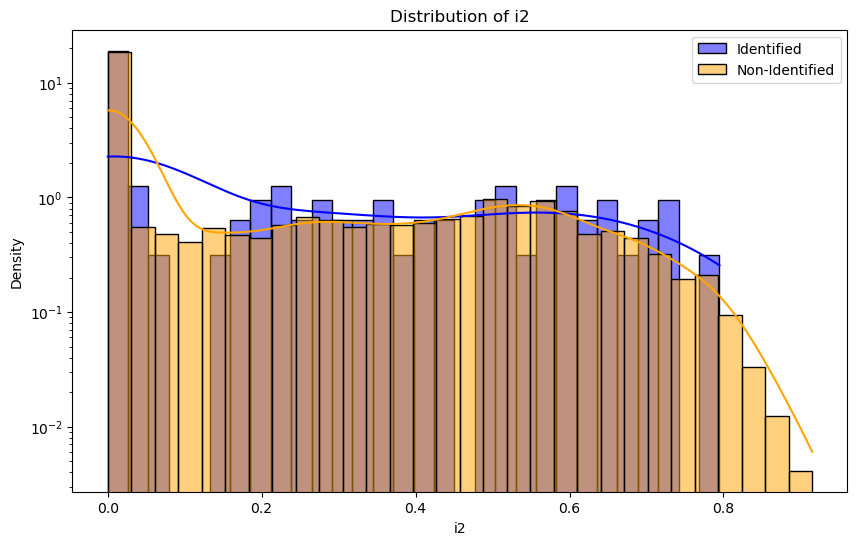

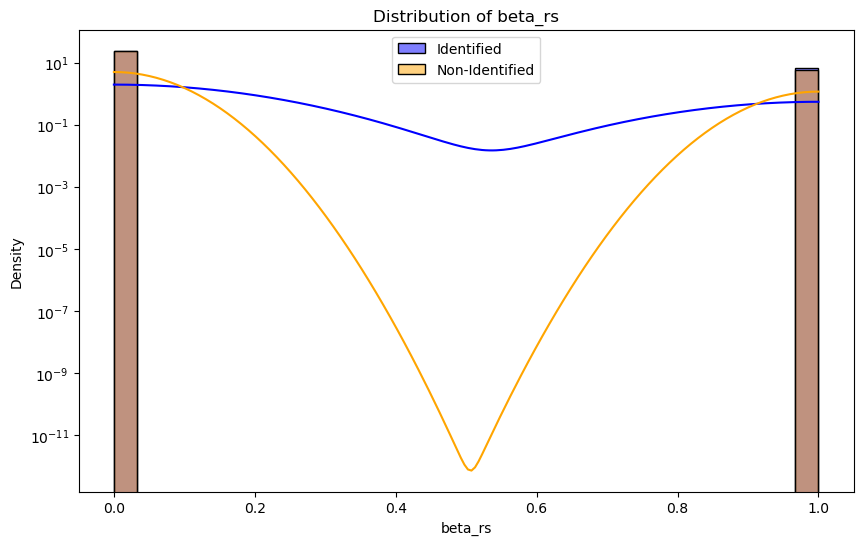

In [114]:
identified = df[df['migraine_association'] == 1]
non_identified = df[df['migraine_association'] == 0]

attributes = df.columns.drop(['rs_number', 'migraine_association'])

for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(identified[attribute], color='blue', kde=True, label='Identified', bins=30, stat="density")
    sns.histplot(non_identified[attribute], color='orange', kde=True, label='Non-Identified', bins=30, stat="density")
    plt.yscale('log') 
    plt.title(f'Distribution of {attribute}')
    plt.legend()
    plt.show()

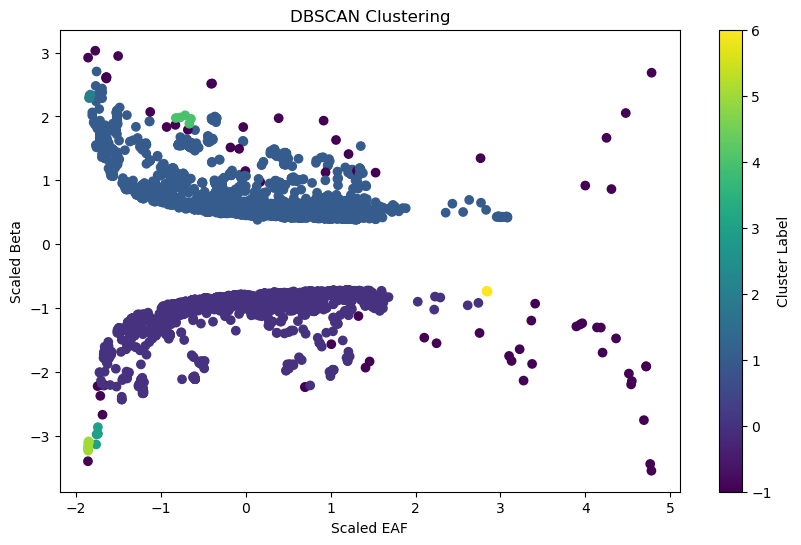

In [111]:
#DBSCAN
clustering_features = df[['eaf', 'beta', 'se']]
clustering_scaled = scaler.fit_transform(clustering_features)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(clustering_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(clustering_scaled[:, 0], clustering_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled EAF')
plt.ylabel('Scaled Beta')
plt.colorbar(label='Cluster Label')
plt.show()


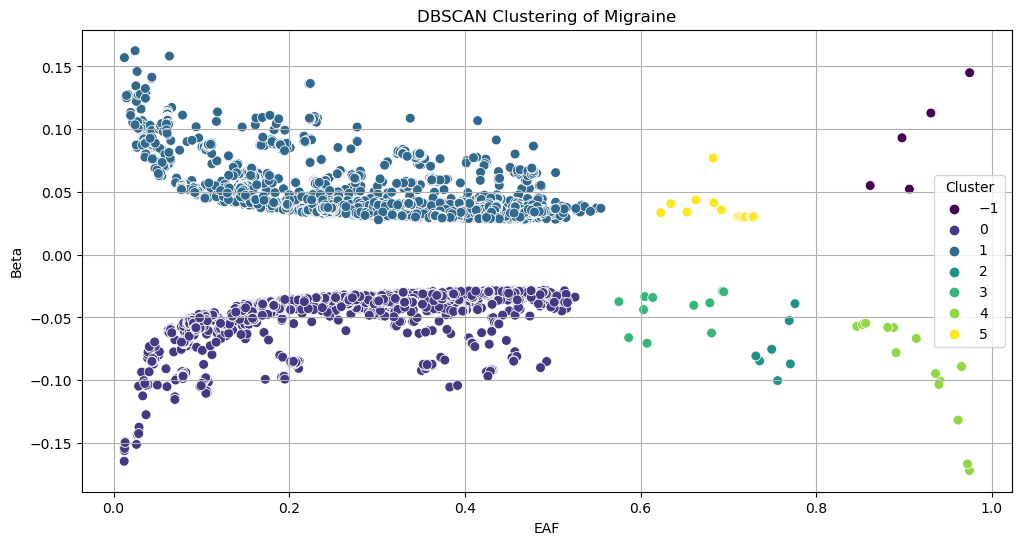

In [90]:
selected_columns = ['eaf', 'beta']

clustering_data = df[selected_columns]

dbscan = DBSCAN(eps=0.05, min_samples=5)
clusters = dbscan.fit_predict(clustering_data)
df['Cluster'] = clusters

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='eaf', y='beta', hue='Cluster', palette='viridis', s=50)
plt.title('DBSCAN Clustering of Migraine')
plt.xlabel('EAF')
plt.ylabel('Beta')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


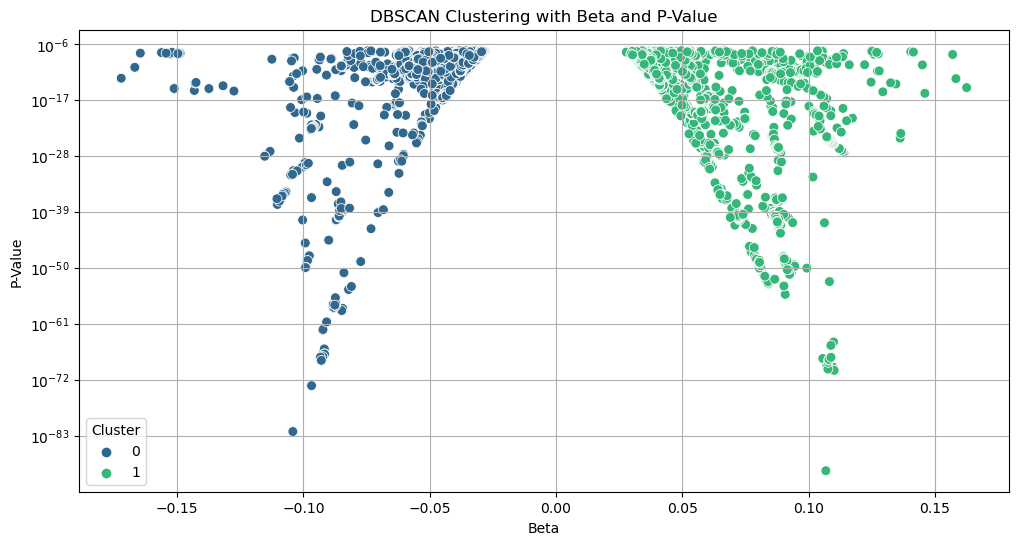

In [91]:
clustering_columns = ['beta', 'p.value']

new_clustering_data = df[clustering_columns]
new_clusters = dbscan.fit_predict(new_clustering_data)
df['New_Cluster'] = new_clusters


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='beta', y='p.value', hue='New_Cluster', palette='viridis', s=50)
plt.title('DBSCAN Clustering with Beta and P-Value')
plt.xlabel('Beta')
plt.ylabel('P-Value')
plt.yscale('log')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

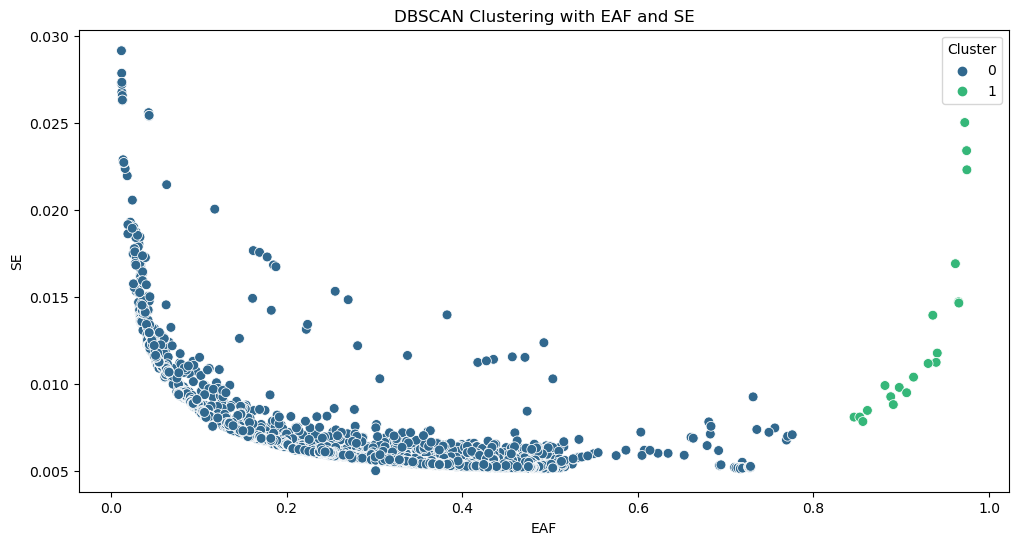

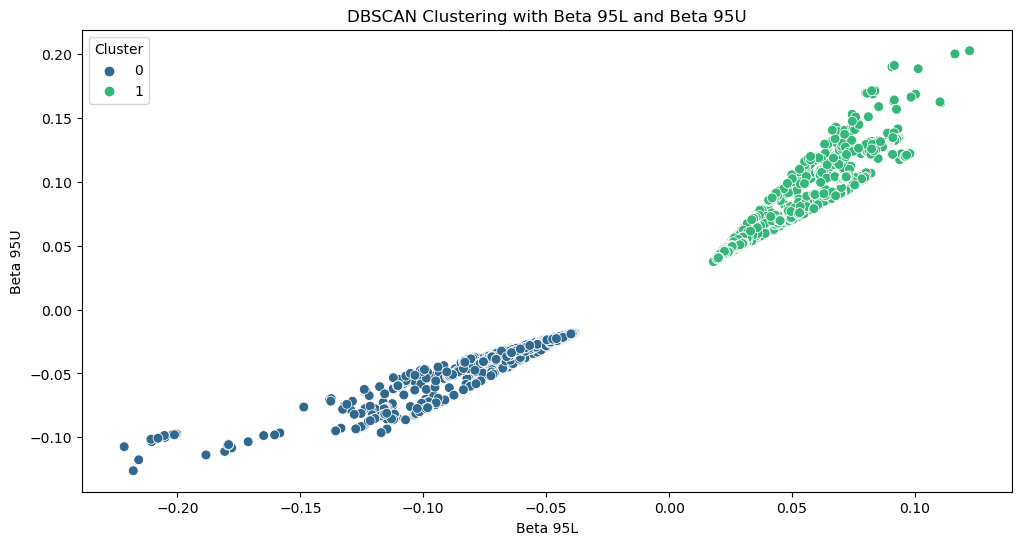

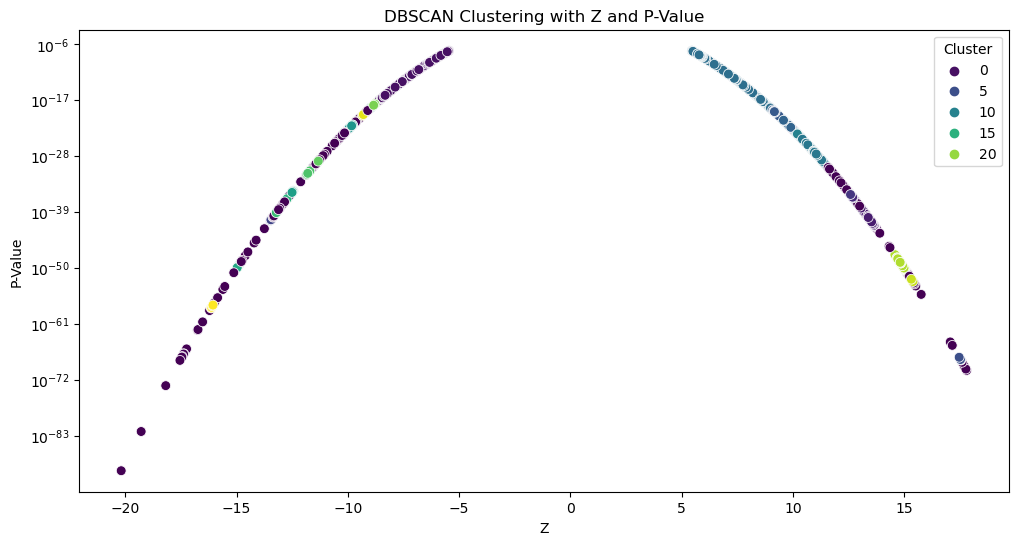

In [93]:
combination_1 = df[['eaf', 'se']]
combination_2 = df[['beta_95L', 'beta_95U']]
combination_3 = df[['z', 'p.value']]

clusters_1 = dbscan.fit_predict(combination_1)
clusters_2 = dbscan.fit_predict(combination_2)
clusters_3 = dbscan.fit_predict(combination_3)

df['Cluster_Comb1'] = clusters_1
df['Cluster_Comb2'] = clusters_2
df['Cluster_Comb3'] = clusters_3

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='eaf', y='se', hue='Cluster_Comb1', palette='viridis', s=50)
plt.title('DBSCAN Clustering with EAF and SE')
plt.xlabel('EAF')
plt.ylabel('SE')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='beta_95L', y='beta_95U', hue='Cluster_Comb2', palette='viridis', s=50)
plt.title('DBSCAN Clustering with Beta 95L and Beta 95U')
plt.xlabel('Beta 95L')
plt.ylabel('Beta 95U')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='z', y='p.value', hue='Cluster_Comb3', palette='viridis', s=50)
plt.title('DBSCAN Clustering with Z and P-Value')
plt.xlabel('Z')
plt.ylabel('P-Value')
plt.yscale('log')  # Using a logarithmic scale for p-value for better visualization
plt.legend(title='Cluster')
plt.show()


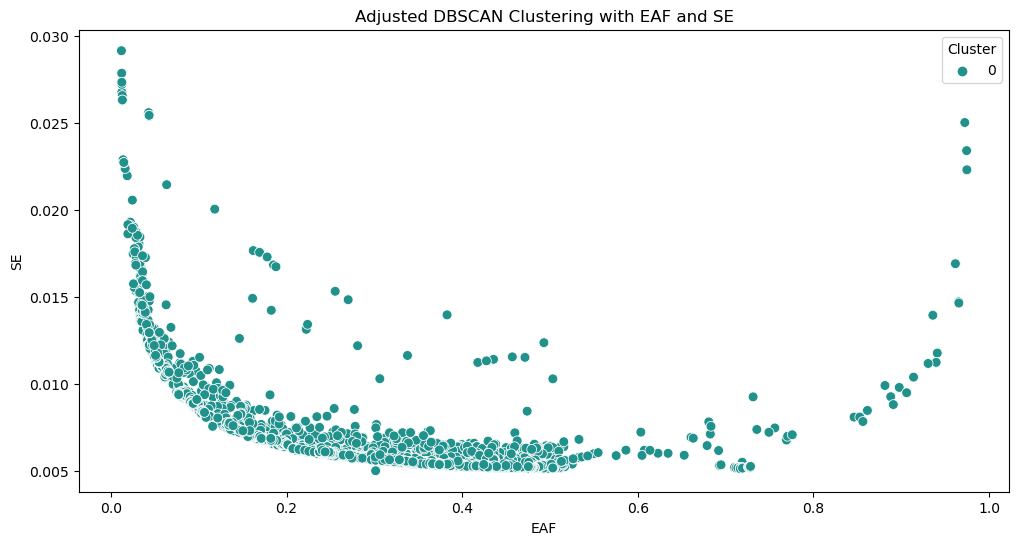

In [94]:
dbscan_adjusted = DBSCAN(eps=0.1, min_samples=5) 
clusters_1_adjusted = dbscan_adjusted.fit_predict(combination_1)

df['Cluster_Comb1_Adjusted'] = clusters_1_adjusted

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='eaf', y='se', hue='Cluster_Comb1_Adjusted', palette='viridis', s=50)
plt.title('Adjusted DBSCAN Clustering with EAF and SE')
plt.xlabel('EAF')
plt.ylabel('SE')
plt.legend(title='Cluster')
plt.show()